In [1]:
import pandas as pd
import numpy as np

mp_real = pd.read_csv("data/real/mp.csv")
vp_real = pd.read_csv("data/real/vp.csv")


mp_report_counts = mp_real['misperid'].value_counts()
vp_report_counts = vp_real['misper_misperid'].value_counts()
combined_counts = mp_report_counts.add(vp_report_counts, fill_value=0)



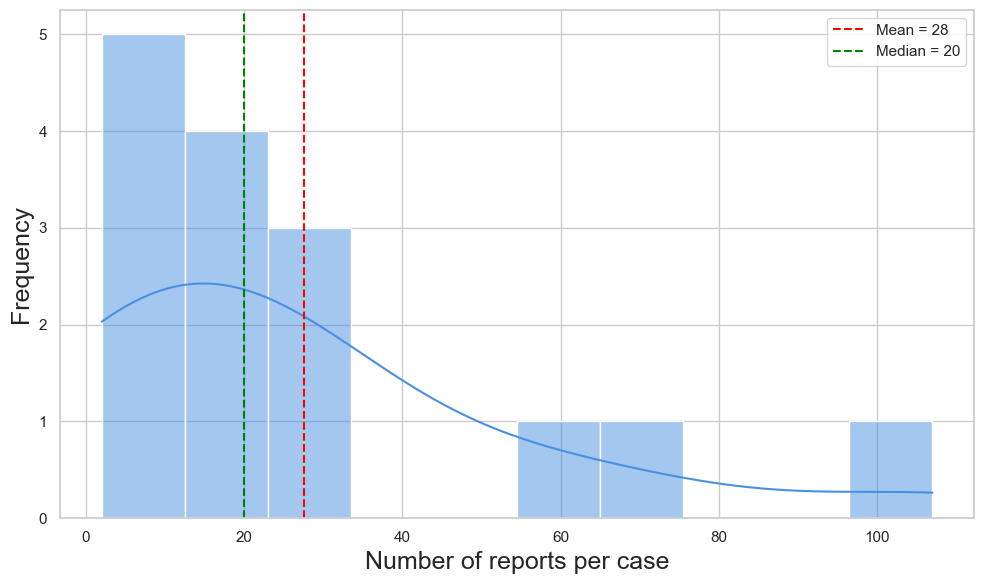

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

col = 'number_of_all_reports_in_a_case'

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))


sns.histplot(combined_counts.values, bins=10, kde=True, color="#4A90E2", edgecolor="white")

# --- Add Mean & Median Lines ---
mean_val = combined_counts.values.mean()
median_val = np.median(combined_counts.values)
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.0f}')
plt.axvline(median_val, color='green', linestyle='--', label=f'Median = {median_val:.0f}')

# --- Labels & Styling ---
plt.xlabel("Number of reports per case", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.legend()
plt.tight_layout()
plt.savefig("plots/num_reports_real.svg")

plt.show()


In [3]:
people_results['number_of_mp_reports_in_a_case'] = people_results['misperid'].map(mp_report_counts)
people_results['number_of_vp_reports_in_a_case'] = people_results['misperid'].map(vp_report_counts)
people_results['number_of_all_reports_in_a_case'] = people_results['number_of_mp_reports_in_a_case'] + people_results['number_of_vp_reports_in_a_case'] 



NameError: name 'people_results' is not defined

In [ ]:
import re
def compare_string_sets( set_truth, set_summ, min_word_overlap=1):
    set_truth = {re.sub(r'[^\w\s]', '', str(s).lower().strip())for s in set_truth}
    set_summ =  {re.sub(r'[^\w\s]', '', str(s).lower().strip()) for s in set_summ}
    
    partial_matches = []
    missing_items = []
    
    def get_words(text):
        s = set(re.findall(r'\b\w+\b', text.lower()))
        s=s-set(['nearby', 'other'])
        return s
    
    def find_word_overlap(str_a, str_b):
        words_a = get_words(str_a)
        words_b = get_words(str_b)

        overlap = words_a.intersection(words_b)
        overlap_all_a = True if len(overlap) == max(len(words_a), len(words_b)) else False
        return overlap, len(overlap), overlap_all_a
    
    positive = 0
    partial = 0
    partial_list=[]
    exact_matches = []
    missing = 0
    missing_list = []
    insert_other = 0
    insert_other_list = []
    false_but_in_text = 0
    false_but_in_text_list = []
    
    hallucination = 0
    hallucination_list = []
    
    
    
    for ent in set_truth:
        print("A", ent)
        matched = False
        for ent_in_summ in set_summ:
            overlapping_words, overlap_count, all_matched = find_word_overlap(ent, ent_in_summ)
            if all_matched:
                print("full", ent_in_summ)
                matched = True
                exact_matches.append(ent)
        
        if not matched:
            for ent_in_summ in set_summ:
                overlapping_words, overlap_count, all_matched = find_word_overlap(ent, ent_in_summ)

                if overlap_count >= min_word_overlap:
                    partial_list.append((ent, ent_in_summ))
                    print("part", ent_in_summ)
                    matched = True
                    break
        if matched == False:
            print("missing", ent)
            missing_list.append(ent)
    
    
    print(exact_matches, partial_list, missing_list)
    for ent_summ in set_summ:
        
        if ent_summ not in partial_list + exact_matches:
            found=False
            for ent in set_truth:
                overlapping_words, overlap_count, _ = find_word_overlap(ent, ent_summ)
                if overlap_count >= min_word_overlap:
                    found = True
                    break
            if found==False:
                insert_other +=1
                insert_other_list.append(ent_summ)
                serialized="Charlotte Saunders, a 14-year-old, was reported missing from her home on Ruthven Road, Kingussie. Charlotte's foster mother, Joan, worried about her absence, informed the authorities when she did not return home. She was last seen by her friend, Sam, playing with a stranger at North Bank Dykes known for its open trails and proximity to a national park."
                serialized = re.sub(r'[^\w\s]', ' ', serialized.lower())
                # print(serialized)

                if ent_summ in serialized:
                    false_but_in_text +=1
                    false_but_in_text_list.append(ent_summ)
                else:
                    hallucination +=1
                    hallucination_list.append(ent_summ)
    print("setsumm:", set_summ)     
    print("settruth:", set_truth)          
    print("exact:", exact_matches, len(exact_matches))
    print("partial:", partial_list)
    print(false_but_in_text_list)
    print("insert_but_in_text", false_but_in_text_list)
    print("hall:",hallucination_list)

    return {
        'potential_positive': len(set(exact_matches))+len(set(partial_list)),
        'positive': len(set(exact_matches)),
        'partial': len(set(partial_list)),
        'missing': len(set(missing_list)),
        'insert_all': len(set(insert_other)),
        'insert_but_in_text': len(set(false_but_in_text)),
        'insert_hallucination': len(set(hallucination)),
    }
 
x = {"Sam", "foster mother - Joan", "mother", "father", "Abigail", "stranger"} 
y= {"Joan foster mother", "Sam", "foster father","friend"} 
compare_string_sets(y,x)

A friend
missing friend
A foster father
part father
A sam
full sam
A joan foster mother
full foster mother  joan
['sam', 'joan foster mother'] [('foster father', 'father')] ['friend']
setsumm: {'abigail', 'mother', 'stranger', 'father', 'foster mother  joan', 'sam'}
settruth: {'friend', 'foster father', 'sam', 'joan foster mother'}
exact: ['sam', 'joan foster mother'] 2
partial: [('foster father', 'father')]
['stranger']
insert_but_in_text ['stranger']
hall: ['abigail']


{'potential_positive': 0,
 'positive': 0,
 'partial': 0,
 'missing': 0,
 'insert_all': 2,
 'insert_but_in_text': 1,
 'insert_hallucination': 1}

In [ ]:
{"Sam", "foster mother", "mother", "her foster father", "foster father"}